In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import util
import util_figures
import util_stimuli
import util_localization_psychophysics
import util_localization_psychophysics_figures


In [2]:
"""
Load all sound localization experiment results and define
mapping from shorthand model names to tags in the results file
"""

fn_data = "data/model/sound_localization.pkl"
with open(fn_data, "rb") as f:
    EXPERIMENT_DATAFRAMES = pickle.load(f)

map_k_to_tag_model = {
    "human": "human",
    "3000_delayed": "models/sound_localization/IHC3000_delayed_integration/arch??",
    "3000": "models/sound_localization/IHC3000/arch??",
    "1000": "models/sound_localization/IHC1000/arch??",
    "320": "models/sound_localization/IHC0320/arch??",
    "50": "models/sound_localization/IHC0050/arch??",
    "3000_delayed_simple": "models/sound_localization/simplified_IHC3000_delayed_integration/arch??",
    "3000_simple": "models/sound_localization/simplified_IHC3000/arch??",
    "1000_simple": "models/sound_localization/simplified_IHC1000/arch??",
    "320_simple": "models/sound_localization/simplified_IHC0320/arch??",
    "50_simple": "models/sound_localization/simplified_IHC0050/arch??",
}


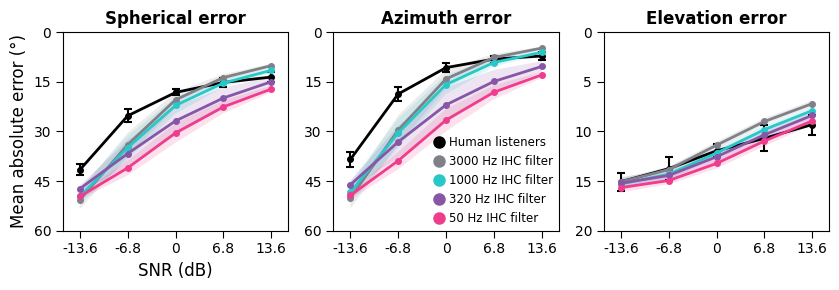

In [3]:
"""
Plot human and model sound localization error (spherical, azimuth,
and elevation) with natural sounds as a function of SNR
"""
tag_expt = "snr_dependency"
df_results = EXPERIMENT_DATAFRAMES[tag_expt]
list_k_model = [
    "human",
    "3000",
    "1000",
    "320",
    "50",
]
dict_key_metric = {
    "deg_err": {
        "str_title": "Spherical error",
        "ylimits": [60, 0],
        "yticks": [60, 45, 30, 15, 0],
    },
    "deg_azim_err": {
        "str_title": "Azimuth error",
        "ylimits": [60, 0],
        "yticks": [60, 45, 30, 15, 0],
    },
    "deg_elev_err": {
        "str_title": "Elevation error",
        "ylimits": [20, 0],
        "yticks": [20, 15, 10, 5, 0],
    },
}
nrows = 1
ncols = len(dict_key_metric)
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8.5, 3.0))
for itr_ax, key_metric in enumerate(dict_key_metric.keys()):
    ax = ax_arr[itr_ax]
    for k_model in list_k_model:
        tag_model = map_k_to_tag_model[k_model]
        color, label = util.get_color_and_label_from_model_tag(tag_model)
        dfi = df_results[np.logical_and.reduce([
            df_results.tag_model == tag_model
        ])]
        if "delayed" in k_model:
            color = "orange"
            label += " (delayed integration)"
        kwargs_format_axes_update = {
            "fontweight_title": "bold",
            "fontsize_ticks": 10,
            "str_ylabel": "Mean absolute error (°)" if itr_ax == 0 else None,
            "str_xlabel": "SNR (dB)" if itr_ax == 0 else None,
        }
        kwargs_format_axes_update.update(dict_key_metric[key_metric])
        kwargs_plot_update = {
            "color": color,
            "label": label,
        }
        ax = util_localization_psychophysics_figures.make_plot_snr_dependency(
            ax,
            dfi,
            key_metric=key_metric,
            kwargs_plot_update=kwargs_plot_update,
            kwargs_format_axes_update=kwargs_format_axes_update)
    if itr_ax == 1:
        kwargs_legend = {
            "loc": "lower right",
            "borderpad": 0.5,
            "borderaxespad": 0,
            "frameon": False,
            "framealpha": 1.0,
            "facecolor": "w",
            "edgecolor": "k",
            "handlelength": 0,
            "markerscale": 2.0,
            "fontsize": 8.5,
        }
        ax.legend(**kwargs_legend)
plt.tight_layout()
plt.show()


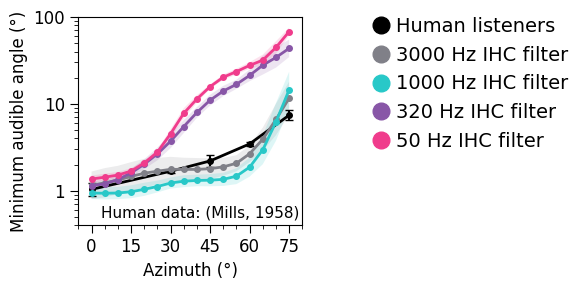

figures_revision1/results_localization_minimum_audible_angle.pdf


In [4]:
"""
Plot human and model minimum audible angle thresholds as a function of azimuth
(Mills, 1958)
"""
tag_expt = "maa_azimuth"
df_results = EXPERIMENT_DATAFRAMES[tag_expt]
list_k_model = [
    "human",
    "3000",
    "1000",
    "320",
    "50",
]
df_results = EXPERIMENT_DATAFRAMES["maa_azimuth"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3))
for k_model in list_k_model:
    tag_model = map_k_to_tag_model[k_model]
    color, label = util.get_color_and_label_from_model_tag(tag_model)
    dfi = df_results[np.logical_and.reduce([
        df_results.tag_model == tag_model,
    ])]
    x = dfi.azim_ref.values
    y = np.exp(dfi["log_maa_mean"].values)
    if "human" in tag_model.lower():
        ax.errorbar(
            x=x,
            y=y,
            yerr=[
                y - np.exp(dfi["log_maa_mean"].values - 2 * dfi["log_maa_sem"].values),
                np.exp(dfi["log_maa_mean"].values + 2 * dfi["log_maa_sem"].values) - y,
            ],
            color=color,
            capsize=3,
            capthick=1,
            ls="")
    else:
        ax.fill_between(
            dfi.azim_ref,
            np.exp(dfi["log_maa_mean"].values - 2 * dfi["log_maa_sem"].values),
            np.exp(dfi["log_maa_mean"].values + 2 * dfi["log_maa_sem"].values),
            alpha=0.15,
            facecolor=color,
            label=None)
    ax.plot(
        x,
        y,
        color=color,
        label=label,
        marker="o",
        ms=4,
        lw=2)
legend_plot_kwargs = {
    "loc": "upper left",
    "frameon": False,
    "handlelength": 0,
    "markerscale": 3,
    "fontsize": 14,
    "borderpad": 0,
    "borderaxespad": 0,
    "bbox_to_anchor": (1.35, 1.00),
}
ax.legend(**legend_plot_kwargs)
ax.text(
    79,
    0.45,
    "Human data: (Mills, 1958)",
    va="bottom",
    ha="right",
    fontsize=11,
)
ax = util_figures.format_axes(
    ax,
    yscale="log",
    ylimits=[0.4, 100],
    yticks=[1, 10, 100],
    yticklabels=[1, 10, 100],
    xticks_minor=np.arange(-5, 81, 5),
    xticks=np.arange(0, 80, 15),
    str_ylabel="Minimum audible angle (°)",
    str_xlabel="Azimuth (°)",
)
plt.tight_layout()
plt.show()

fn_fig = "figures_revision1/results_localization_minimum_audible_angle.pdf"
fig.savefig(fn_fig, bbox_inches='tight', pad_inches=0.05, transparent=True)
print(fn_fig)


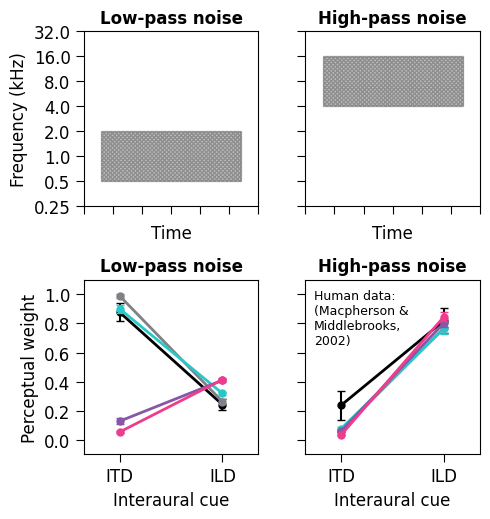

In [5]:
"""
Plot human and model ITD/ILD perceptual weights in low- and high-pass noise
(Macpherson & Middlebrooks, 2002)
"""
tag_expt = "itd_ild_weighting"
df_results = EXPERIMENT_DATAFRAMES[tag_expt]
list_k_model = [
    "human",
    "3000",
    "1000",
    "320",
    "50",
]

def schematic_spectrogram(ax, t, f, **kwargs):
    xy = (t[0], f[0])
    width = t[1] - t[0]
    height = f[1] - f[0]
    rect = matplotlib.patches.Rectangle(xy, width, height, angle=0.0, **kwargs)
    ax.add_patch(rect)
    return ax

nrows = 2
ncols = 2
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2.5 * ncols, 2.65 * nrows), sharey="row")
list_band = ["(500, 2000)", "(4000, 16000)"]
for itr_ax, band in enumerate(list_band):
    ax = ax_arr[0, itr_ax]
    ax = schematic_spectrogram(
        ax,
        t=(0.1, 0.9),
        f=(4.0, 16.0) if "4000" in band else (0.5, 2.0),
        color="k",
        alpha=0.25,
        hatch="xxxxxxxx",
        rasterized=True)
    yticks = np.array([250, 500, 1000, 2000, 4000, 8000, 16000, 32000]) / 1e3
    yticklabels = yticks
    xticks = np.arange(0, 1.1, 1/6)
    xticklabels = []
    ylimits = [yticks[0], yticks[-1]]
    ax = util_figures.format_axes(
        ax,
        str_xlabel="Time",
        str_ylabel="Frequency (kHz)" if itr_ax == 0 else None,
        str_title="High-pass noise" if "4000" in band else "Low-pass noise",
        fontweight_title="bold",
        yticks=yticks,
        yticklabels=yticks,
        yticks_minor=[],
        xticks=xticks,
        xticklabels=xticklabels,
        xticks_minor=[],
        ylimits=ylimits,
        xscale="linear",
        yscale="log",
    )
    for k_model in list_k_model:
        ax = ax_arr[1, itr_ax]
        tag_model = map_k_to_tag_model[k_model]
        color, label = util.get_color_and_label_from_model_tag(tag_model)
        dfi = df_results[np.logical_and.reduce([
            df_results.tag_model == tag_model,
        ])]
        label = label.replace(" IHC filter", "").replace(" listener", "")
        if "delayed" in tag_model:
            color = "orange"
            label += " (delayed integration)"
        kwargs_plot_update = {
            "color": color,
            "mfc": color,
            "ls": "-",
            "ms": 4,
            "label": label,
        }
        kwargs_legend_update = {
            "loc": "upper left",
            "frameon": False,
            "handlelength": 0,
            "markerscale": 1.25,
            "fontsize": 9,
            "borderaxespad": 0.5,
        }
        ax = util_localization_psychophysics_figures.make_plot_itd_ild_weighting(
            ax,
            dfi,
            list_band=[band],
            color=color,
            include_legend=False,
            kwargs_plot_update=kwargs_plot_update,
            kwargs_legend_update=kwargs_legend_update,
            str_title="High-pass noise" if "4000" in band else "Low-pass noise",
            fontweight_title="bold",
            yticks=np.arange(0, 1.1, 0.2),
            ylimits=[-0.1, 1.1],
            )
        if itr_ax > 0:
            ax.yaxis.label.set_color("w")

ax = ax_arr[1, 1]
ax.text(
    0.05,
    0.95,
    "Human data:\n(Macpherson &\nMiddlebrooks,\n2002)",
    va="top",
    ha="left",
    fontsize=9,
    transform=ax.transAxes,
)
plt.tight_layout()
plt.show()

# fn_fig = "figures_revision1/results_localization_itd_ild_weighting.pdf"
# fig.savefig(fn_fig, bbox_inches='tight', pad_inches=0.05, transparent=True)
# print(fn_fig)


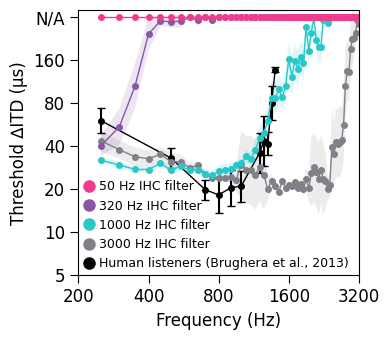

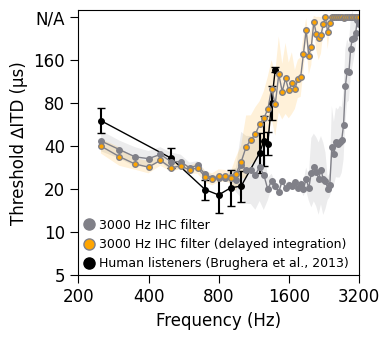

In [6]:
"""
Plot human and model ITD lateralization thresholds as a function of frequency
(Brughera et al., 2013)
"""
tag_expt = "itd_threshold"
df_results = EXPERIMENT_DATAFRAMES[tag_expt]

for list_k_model in [
    [
        "human",
        "3000",
        "1000",
        "320",
        "50",
    ],
    [
        "human",
        "3000",
        "3000_delayed",
    ],
]:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.0, 3.5))
    for k_model in list_k_model:
        tag_model = map_k_to_tag_model[k_model]
        color, label = util.get_color_and_label_from_model_tag(tag_model)
        if "human" in label.lower():
            label += " (Brughera et al., 2013)"
        if (k_model == "3000_delayed") and len(list_k_model) == 3:
            mfc = "orange"
            label = "3000 Hz IHC filter (delayed integration)"
        elif (k_model == "3000_delayed") and len(list_k_model) == 6:
            mfc = "orange"
            label = "3000 Hz IHC filter\n(delayed integration)"
        else:
            mfc = color
        dfi = df_results[np.logical_and.reduce([
            df_results.tag_model == tag_model,
        ])]
        x = dfi["f"].values
        y = np.exp(dfi["log_itd_threshold_mean"].values)
        if "human" in tag_model.lower():
            ax.errorbar(
                x=x,
                y=y,
                yerr=[
                    y - np.exp(dfi["log_itd_threshold_mean"].values - 1 * dfi["log_itd_threshold_sem"].values),
                    np.exp(dfi["log_itd_threshold_mean"].values + 1 * dfi["log_itd_threshold_sem"].values) - y,
                ],
                color=color,
                capsize=3,
                capthick=1,
                ls="")
        else:
            ax.fill_between(
                x,
                np.exp(dfi["log_itd_threshold_mean"].values - 2 * dfi["log_itd_threshold_sem"].values),
                np.exp(dfi["log_itd_threshold_mean"].values + 2 * dfi["log_itd_threshold_sem"].values),
                alpha=0.15,
                facecolor=mfc,
                label=None)
        ax.plot(
            x,
            y,
            color=color,
            label=label,
            marker="o",
            mfc=mfc,
            mew=1.0,
            ms=4,
            lw=1.0)
    legend_plot_kwargs = {
        "loc": "lower center",
        "frameon": False,
        "handlelength": 0,
        "markerscale": 2,
        "fontsize": 9,
        "borderaxespad": 0,
        "ncol": 1,
    }
    handles, labels = ax.get_legend_handles_labels()
    if len(list_k_model) == 5:
        handles = handles[::-1]
        labels = labels[::-1]
    else:
        handles = handles[1:] + handles[:1]
        labels = labels[1:] + labels[:1]
    ax.legend(handles, labels, **legend_plot_kwargs)
    ax = util_figures.format_axes(
        ax,
        yscale="log",
        xscale="log",
        ylimits=[5, 360],
        yticks=[5, 10, 20, 40, 80, 160, 320],
        yticks_minor=[],
        yticklabels=[5, 10, 20, 40, 80, 160, "N/A"],
        xlimits=[200, 3200],
        xticks=[200, 400, 800, 1600, 3200],
        xticks_minor=[],
        xticklabels=[200, 400, 800, 1600, 3200],
        str_ylabel="Threshold ∆ITD (µs)",
        str_xlabel="Frequency (Hz)",
    )
    ax.set_facecolor("w")
    fig.patch.set_color("none")
    plt.tight_layout()
    plt.show()

    # fn_fig = "figures_revision1/results_localization_itd_threshold.pdf"
    # if "3000_delayed" in list_k_model:
    #     fn_fig = fn_fig.replace(".pdf", "_delayed_binaural_integration.pdf")
    # fig.savefig(fn_fig, bbox_inches="tight", pad_inches=0.05, transparent=False)
    # print(fn_fig)


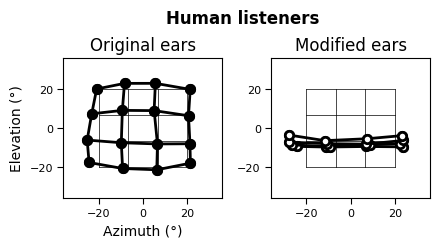

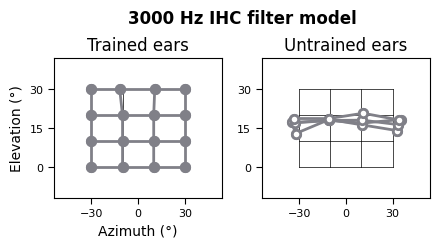

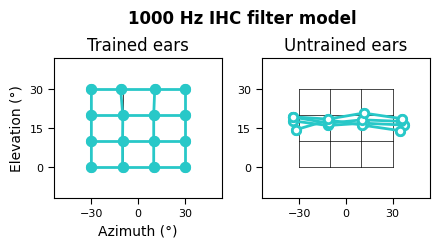

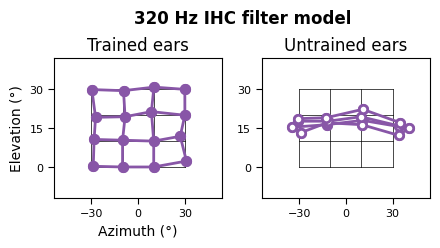

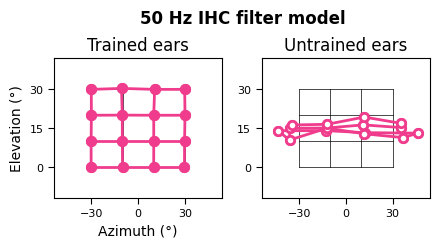

In [7]:
"""
Plot human and model localization judgments with original and modified ears
(Hofman et al., 1998)
"""
tag_expt = "new_ears"
df_results = EXPERIMENT_DATAFRAMES[tag_expt]
list_k_model = [
    "human",
    "3000",
    "1000",
    "320",
    "50",
]
for k_model in list_k_model:
    tag_model = map_k_to_tag_model[k_model]
    color, label = util.get_color_and_label_from_model_tag(tag_model)
    if "delayed" in k_model:
        color = "orange"
        label = label + " (delayed integration)"
    df_old = df_results[np.logical_and.reduce([
        df_results.tag_model == tag_model,
        df_results.new_ears == False,
    ])]
    df_new = df_results[np.logical_and.reduce([
        df_results.tag_model == tag_model,
        df_results.new_ears == True,
    ])]
    fig, ax_arr = plt.subplots(figsize=(4.5, 2.65), nrows=1, ncols=2)
    kwargs_ref = {
        "lw": 0.5,
        "color": "k",
        "marker": None,
    }
    kwargs_plot = {
        "lw": 2.0,
        "ls": "-",
        "marker": "o",
        "mew": 2.0,
        "ms": 6,
        "color": color
    }
    for itr_ax, df in enumerate([df_old, df_new]):
        ax = ax_arr[itr_ax]
        kwargs_plot_diff = {
            "mfc": "w" if itr_ax == 1 else None,
        }
        for azim_true in np.unique(df.azim_true):
            dfi = df[df.azim_true == azim_true].sort_values(by="elev_true")
            x_ref = dfi.azim_true
            y_ref = dfi.elev_true
            ax.plot(x_ref, y_ref, **kwargs_ref)
            x = dfi.azim_pred_mean
            y = dfi.elev_pred_mean
            ax.plot(x, y, **kwargs_plot, **kwargs_plot_diff)
        for elev_true in np.unique(df.elev_true):
            dfi = df[df.elev_true == elev_true].sort_values(by="azim_true")
            x_ref = dfi.azim_true
            y_ref = dfi.elev_true
            ax.plot(x_ref, y_ref, **kwargs_ref)
            x = dfi.azim_pred_mean
            y = dfi.elev_pred_mean
            ax.plot(x, y, **kwargs_plot, **kwargs_plot_diff)
        xticks = [-30, 0, 30]
        yticks = [0, 15, 30]
        str_title = "Trained ears" if itr_ax == 0 else "Untrained ears"
        if "human" in tag_model.lower():
            xticks = [-20, 0, 20]
            yticks = xticks
            str_title = "Original ears" if itr_ax == 0 else "Modified ears"
        xr = (xticks[-1] - xticks[0]) / 2.5
        yr = (yticks[-1] - yticks[0]) / 2.5
        xlimits = [xticks[0] - xr, xticks[-1] + xr]
        ylimits = [yticks[0] - yr, yticks[-1] + yr]  
        ax = util_figures.format_axes(
            ax,
            xticks=xticks,
            yticks=yticks,
            xlimits=xlimits,
            ylimits=ylimits,
            fontsize_ticks=8,
            fontsize_labels=10,
            str_title=str_title,
            str_xlabel="Azimuth (°)" if itr_ax == 0 else None,
            str_ylabel="Elevation (°)" if itr_ax == 0 else None,
        )
    plt.suptitle(
        f"{label} model" if "human" not in label.lower() else label,
        x=0.55,
        y=0.92,
        weight="bold")
    plt.tight_layout()
    plt.show()


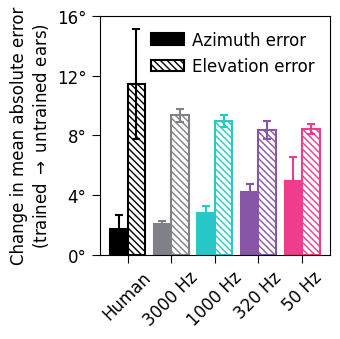

In [8]:
"""
Plot increase in average azimuth and elevation error as a result of changing ears
(Hofman et al., 1998)
"""
tag_expt = "new_ears"
df_results = EXPERIMENT_DATAFRAMES[tag_expt]
list_k_model = [
    "human",
    "3000",
    "1000",
    "320",
    "50",
]
df = df_results.groupby(["tag_model", "new_ears"]).agg({
    "azim_true": list,
    "elev_true": list,
    "azim_pred_arr": list,
    "elev_pred_arr": list,
}).reset_index()

def compute_error(df, key="azim"):
    y = np.array(df[f"{key}_pred_arr"])
    x = np.array(df[f"{key}_true"])
    x = x[:, np.newaxis, np.newaxis] * np.ones_like(y)
    x = x.mean(axis=-1)
    y = y.mean(axis=-1)
    shape = y.shape
    x = x.reshape([-1])
    y = y.reshape([-1])
    err = util_localization_psychophysics.angular_distance(x, y).reshape(shape)
    err = np.mean(err, axis=0)
    while err.ndim > 1:
        err = np.mean(err, axis=-1)
    return err

df["azim_err"] = df.apply(compute_error, key="azim", axis=1)
df["elev_err"] = df.apply(compute_error, key="elev", axis=1)
df_old = df[df["new_ears"] == False].reset_index(drop=True)
df_new = df[df["new_ears"] == True].reset_index(drop=True)
list_delta_azim_err = []
list_delta_elev_err = []
for itr0 in range(len(df_new)):
    dfi_new = df_new.iloc[itr0]
    dfi_old = df_old.iloc[itr0]
    list_delta_azim_err.append(np.array(dfi_new["azim_err"]) - np.array(dfi_old["azim_err"]))
    list_delta_elev_err.append(np.array(dfi_new["elev_err"]) - np.array(dfi_old["elev_err"]))
df_new["delta_azim_err"] = list_delta_azim_err
df_new["delta_elev_err"] = list_delta_elev_err
df_new["delta_azim_err_mean"] = df_new["delta_azim_err"].map(lambda _: np.mean(_))
df_new["delta_elev_err_mean"] = df_new["delta_elev_err"].map(lambda _: np.mean(_))
df_new["delta_azim_err_sem"] = df_new["delta_azim_err"].map(lambda _: np.std(_) / np.sqrt(len(_)))
df_new["delta_elev_err_sem"] = df_new["delta_elev_err"].map(lambda _: np.std(_) / np.sqrt(len(_)))

fig, ax = plt.subplots(figsize=(3.5, 3.5))
for itr_key, key in enumerate(["azim", "elev"]):
    xticks = []
    xticklabels = []
    for itr_model, k_model in enumerate(list_k_model):
        tag_model = map_k_to_tag_model[k_model]
        color, label = util.get_color_and_label_from_model_tag(tag_model)
        dfi = df_new[np.logical_and.reduce([
            df_new.tag_model == tag_model,
        ])]
        assert len(dfi) == 1
        dfi = dfi.iloc[0]
        x = itr_model + (-0.2 + 0.4 * itr_key)
        y = dfi[f"delta_{key}_err_mean"]
        yerr = 2 * dfi[f"delta_{key}_err_sem"]
        kwargs = {
            "color": "w" if itr_key == 1 else color,
            "edgecolor": color,
            "lw": 1.5,
            "width": 0.4,
            "hatch": "\\\\\\\\\\" if itr_key == 1 else None,
        }
        if "human" in tag_model.lower():
            kwargs["label"] = "Azimuth error" if key == "azim" else "Elevation error"
        ax.bar(x, y, **kwargs)
        ax.errorbar(x, y, yerr, elinewidth=1.5, capthick=1.5, capsize=3, color=color)
        xticks.append(itr_model)
        xticklabels.append(label.replace(" IHC filter", "").replace(" listeners", ""))
legend_plot_kwargs = {
    "loc": "upper right",
    "frameon": False,
    "handlelength": 2,
    "markerscale": 0,
    "fontsize": 12,
    "handletextpad": 0.5,
}
ax.legend(**legend_plot_kwargs)
ax = util_figures.format_axes(
    ax,
    ylimits=[0, 16],
    xticks=xticks,
    xticklabels=xticklabels,
    yticks=[0, 4, 8, 12, 16],
    yticklabels=["0°", "4°", "8°", "12°", "16°"],
    str_ylabel=("Change in mean absolute error\n"
                r"(trained $\rightarrow$ untrained ears)"),
    fontweight_title="bold",
)
ax.set_xticklabels(xticklabels, rotation=45)
plt.tight_layout()
plt.show()


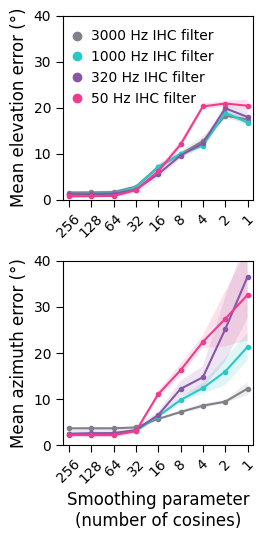

In [9]:
"""
Plot effect of smoothing HRTF spectral cues on model elevation and azimuth error
(Kulkarni & Colburn, 1998)
"""
tag_expt = "spectral_smoothing"
df_results = EXPERIMENT_DATAFRAMES[tag_expt]
list_k_model = [
    "human",
    "3000",
    "1000",
    "320",
    "50",
]
list_key_y_axis = [
    "deg_elev_err",
    "deg_azim_err",
]
nrows = len(list_key_y_axis)
ncols = 1
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2.75 * ncols, 2.75 * nrows))
ax_arr = np.array(ax_arr).reshape([-1])
for k_model in list_k_model[1:]:
    tag_model = map_k_to_tag_model[k_model]
    color, label = util.get_color_and_label_from_model_tag(tag_model)
    df = df_results[df_results.tag_model == tag_model]
    for itr_ax, key_y_axis in enumerate(list_key_y_axis):
        ax = ax_arr[itr_ax]
        if f"{key_y_axis}_mean" in df.columns:
            x = df["smoothed"].values
            y = df[f"{key_y_axis}_mean"].values
            yerr = 2 * df[f"{key_y_axis}_sem"].values
            if not np.isnan(y).all():
                ax.fill_between(
                    x,
                    y-yerr,
                    y+yerr,
                    alpha=0.15,
                    facecolor=color,
                    label=None)
                ax.plot(x, y, color=color, label=label, marker=".", ms=6, lw=1.5)

for itr_ax, key_y_axis in enumerate(list_key_y_axis):
    ax = ax_arr[itr_ax]
    if itr_ax == 0:
        kwargs_legend = {
            "loc": "upper left",
            "borderpad": 0.5,
            "handletextpad": 1.0,
            "borderaxespad": 0.5,
            "frameon": False,
            "handlelength": 0,
            "markerscale": 2.0,
            "fontsize": 10,
        }
        ax.legend(**kwargs_legend)
    xlimits = [256*1.2, 1 / 1.2]
    xticks = [256, 128, 64, 32, 16, 8, 4, 2, 1]
    xticklabels = xticks
    ylimits = [0, 40]
    yticks = [0, 10, 20, 30, 40]
    if key_y_axis == "pct_correct":
        ylimits = [45, 100]
        yticks = [50, 60, 70, 80, 90, 100]
    ax = util_figures.format_axes(
        ax,
        str_xlabel=f"Smoothing parameter\n(number of cosines)" if itr_ax == 1 else None,
        str_ylabel="Mean azimuth error (°)" if "azim" in key_y_axis else "Mean elevation error (°)",
        fontsize_ticks=10,
        xlimits=xlimits,
        ylimits=ylimits,
        yticks=yticks,
        xticks=xticks,
        xticklabels=xticklabels,
        xscale="log",
        xticks_minor=[],
    )
    ax.set_xticklabels(xticklabels, rotation=45)
plt.tight_layout()
plt.show()


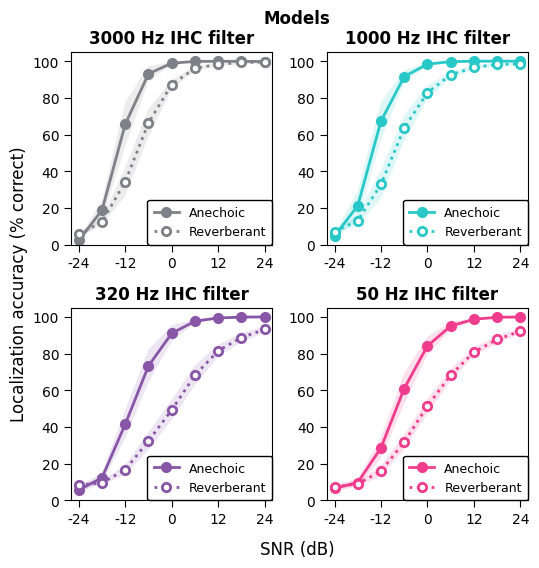

In [10]:
"""
Plot model speech localization accuracy as a function of SNR
in anechoic and reverberant conditions
"""
tag_expt = "speech_in_noise_in_reverb"
df_results = EXPERIMENT_DATAFRAMES[tag_expt]
list_k_model = [
    "3000",
    "1000",
    "320",
    "50",
]
list_index_room = [1, 0]
fig, ax_arr = plt.subplots(
    nrows=2,
    ncols=np.ceil(len(list_k_model) / 2).astype(int),
    figsize=(5.5, 5.5),
)
ax_arr = ax_arr.reshape([-1])
for itr_ax, k_model in enumerate(list_k_model):
    tag_model = map_k_to_tag_model[k_model]
    color, label = util.get_color_and_label_from_model_tag(tag_model)
    ax = ax_arr[itr_ax]
    kwargs_format_axes_update = {
        "str_xlabel": "SNR (dB)" if itr_ax == 2 else None,
        "str_ylabel": "Accuracy (% correct)" if itr_ax == 2 else None,
        "str_title": label,
        "fontweight_title": "bold",
        "fontsize_ticks": 10,
    }
    kwargs_legend_update = {
        "frameon": True,
        "framealpha": 1,
        "borderaxespad": 0,
        "handlelength": 2,
        "fontsize": 9,
    }
    util_localization_psychophysics_figures.make_plot_speech_in_noise_in_reverb(
        ax,
        df_results[df_results.tag_model == tag_model],
        list_index_room=list_index_room,
        color=color,
        kwargs_format_axes_update=kwargs_format_axes_update,
        kwargs_legend_update=kwargs_legend_update,
        include_legend=True)
plt.tight_layout()
ax_arr[2].set_xlabel("SNR (dB)", ha="center", x=1.125, labelpad=10, fontsize=12)
ax_arr[2].set_ylabel("Localization accuracy (% correct)", va="center", y=1.125, labelpad=10, fontsize=12)
fig.suptitle("Models", fontsize=12, fontweight="bold", x=0.55, y=1.01, ha="center", va="top")
plt.show()


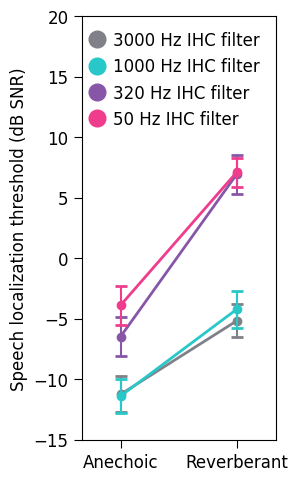

In [11]:
"""
Plot model speech localization-in-noise thresholds as a function of
reverberation condition to illustrate interaction with phase locking
manipulation
"""
tag_expt = "speech_in_noise_in_reverb"
df_results = EXPERIMENT_DATAFRAMES[tag_expt]
list_k_model = [
    "3000",
    "1000",
    "320",
    "50",
]
list_index_room = [1, 0]
df = df_results.explode(["correct_list", "fn_eval_list"]).rename(columns={"correct_list": "correct", "fn_eval_list": "fn_eval"})
df = df.loc[:, ["tag_model", "fn_eval", "index_room", "snr", "correct"]].groupby(["tag_model", "fn_eval", "index_room"]).agg({
    "snr": list,
    "correct": list,
}).reset_index()

def get_threshold_snr(dfi):
    x = np.array(dfi.snr)
    y = np.array(dfi.correct)
    y = y[~np.isinf(x)]
    x = x[~np.isinf(x)]
    return np.interp(0.707, y, x)

df["threshold"] = df.apply(get_threshold_snr, axis=1)
df_statistics = df[np.logical_and.reduce([
    df.index_room.isin(list_index_room),
    df.tag_model.isin([map_k_to_tag_model[k_model] for k_model in list_k_model]),
])].copy()
df = util.flatten_columns(df.groupby(["tag_model", "index_room"]).agg({
    "threshold": [list, "mean", "sem"],
    "fn_eval": [list],
}).reset_index(), sep="_")

fig, ax = plt.subplots(figsize=(2.5, 5.5))
for k_model in list_k_model:
    tag_model = map_k_to_tag_model[k_model]
    color, label = util.get_color_and_label_from_model_tag(tag_model)
    dfi = df[np.logical_and.reduce([
        df.tag_model == tag_model,
        df.index_room.isin(list_index_room),
    ])]
    dfi = dfi.sort_values(by="index_room", ascending=False)
    if "delayed" in k_model:
        color = "orange"
        label = label + " (delayed integration)"
    x = np.arange(len(dfi.index_room))
    y = dfi.threshold_mean
    yerr = 2 * dfi.threshold_sem
    ax.errorbar(x, y, yerr=yerr, color=color, marker="", ls="", ms=6, capsize=4, capthick=2, elinewidth=1.5)
    ax.plot(x, y, color=color, marker="o", ms=6, label=label, lw=2)
ax.legend(
    loc="upper left",
    fontsize=12,
    frameon=False,
    handlelength=0,
    handletextpad=1,
    markerscale=2)
ax = util_figures.format_axes(
    ax,
    str_ylabel="Speech localization threshold (dB SNR)",
    xticks=x,
    xlimits=[x[0]-1/3, x[-1] + 1/3],
    ylimits=[-15, 20],
    yticks=np.arange(-15, 21, 5),
    xticklabels=["Anechoic", "Reverberant"],
)
plt.show()


In [13]:
"""
Significance test for the interaction between phase locking and reverberation condition
on speech localization-in-noise thresholds. Because data violate ANOVA assumptions, we
permutation test analogous to a mixed model ANOVA. An F-statistic was computed from the
speech localization thresholds, with phase locking cutoff as a between-subjects factor
and reverberation was a within-subjects factor. The F-statistic was re-computed 10000
times with permuted reverberation labels to assemble the null distribution used to
calculate a p-value for the actual F-statistic.

This cell generates the null distribution. The variable `df_statistics` must be defined
from the previous cell. Multiprocessing is used to run the 10000 permuted-label ANOVAs
in parallel.
"""

import multiprocessing
import pingouin as pg
import tqdm

def permutation_test(seed, n=500):
    np.random.seed(seed)
    null_dist = []
    iterator = np.arange(n) if seed > 0 else tqdm.tqdm(np.arange(n))
    for _ in iterator:
        df_tmp = df_statistics.copy()
        df_tmp["index_room"] = df_tmp["index_room"].sample(frac=1).values
        aov_mixed = pg.mixed_anova(
            data=df_tmp,
            dv="threshold",
            subject="fn_eval",
            within="index_room",
            between="tag_model",
            correction="auto")
        null_dist.append(aov_mixed.F.values[2])
    return null_dist

n = 20
with multiprocessing.Pool(n) as p:
    null_dist = p.map(permutation_test, np.arange(0, n))
null_dist = np.array(null_dist).reshape([-1])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:38<00:00, 13.03it/s]


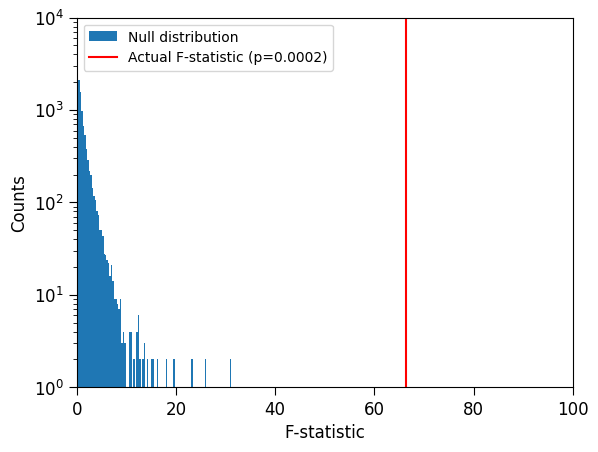

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,tag_model,1615.292063,3,36,538.430688,53.001420,2.753431e-13,0.815389,NaN
1,index_room,1776.375975,1,36,1776.375975,2035.934579,2.773664e-33,0.982625,1.0
2,Interaction,173.987336,3,36,57.995779,66.469944,9.453388e-15,0.847075,NaN


In [14]:
"""
The actual F-statistic is computed via a mixed-model ANOVA with intact labels
and evaluated under the null distribution.
"""

aov_mixed = pg.mixed_anova(
    data=df_statistics,
    dv="threshold",
    subject="fn_eval",
    within="index_room",
    between="tag_model",
    correction="auto")

fig, ax = plt.subplots()
ax.hist(null_dist, 1000, label="Null distribution")
ax.axvline(
    aov_mixed.F.values[2],
    color="r",
    label=f"Actual F-statistic (p={2 * np.mean(np.array(null_dist) >= aov_mixed.F.values[2])})",
)
util_figures.format_axes(
    ax,
    yscale="log",
    ylimits=[1, 10000],
    xlimits=[0, 100],
    str_xlabel="F-statistic",
    str_ylabel="Counts",
)
ax.legend()
plt.show()

aov_mixed
